---
title: "Analysis of Human Thymus Development data across the different epochs."
format:
  html:
    code-fold: true
jupyter: python3
---

In [2]:
import os
import csv
import pandas as pd
import scanpy as sc
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from adjustText import adjust_text
from statistics import stdev
import anndata

# PATH TO GET THE RESULT IN THE OUTPUT
PATH_PROJECT = "/mnt/DOSI/PLATEFORMES/BIOINFORMATIQUE/04_PROJECT/scLLM"
PATH_EXPERIMENT = os.path.join( PATH_PROJECT, "Human_Thymus_Development_Atlas")
PATH_EXPERIMENT_OUTPUT = os.path.join( PATH_EXPERIMENT, "05_Output")
PATH_EXPERIMENT_OUTPUT_ANALYSIS = os.path.join( PATH_EXPERIMENT_OUTPUT, "03_scGPTAnalysis")

#PATH TO GET THE RAW DATASET
PATH_EXPERIMENT_REFERENCE = os.path.join( PATH_EXPERIMENT, "01_Reference")
PATH_EXPERIMENT_REFERENCE_EXTRA = os.path.join( PATH_EXPERIMENT_REFERENCE, "00_Dataset")
PATH_INPUT_DATASET_FILE = os.path.join( PATH_EXPERIMENT_REFERENCE_EXTRA, "Human_Thymus_Development_Atlas.h5ad")

#PATH TO GET THE VARIABLE GENE
PATH_EXPERIMENT_OUTPUT_GLOBAL_HETEROGENEITY = os.path.join( PATH_EXPERIMENT_OUTPUT, "02a_GlobalHeterogenity")
PATH_INPUT_VARIABLE_GENE_FILE = os.path.join( PATH_EXPERIMENT_OUTPUT_GLOBAL_HETEROGENEITY, "Variable_Gene.csv")


#Output for the result
PATH_EXPERIMENT_OUTPUT_SCGPT = os.path.join( PATH_EXPERIMENT_OUTPUT, "06_scGPTDifferentEpoch")
os.makedirs(PATH_EXPERIMENT_OUTPUT_SCGPT, exist_ok = True)

# Select the value for the graph below
BEST_MEAN_PREDICTION = 0.80
BEST_VARIANCE_PREDICTION = 0.02
WORST_MEAN_PREDICTION = 0.6
WORST_VARIANCE_PREDICTION = 0.05  

dataset_anndata = sc.read_h5ad(PATH_INPUT_DATASET_FILE)
variable_gene = pd.read_csv(PATH_INPUT_VARIABLE_GENE_FILE)

##### Every run of one epoch

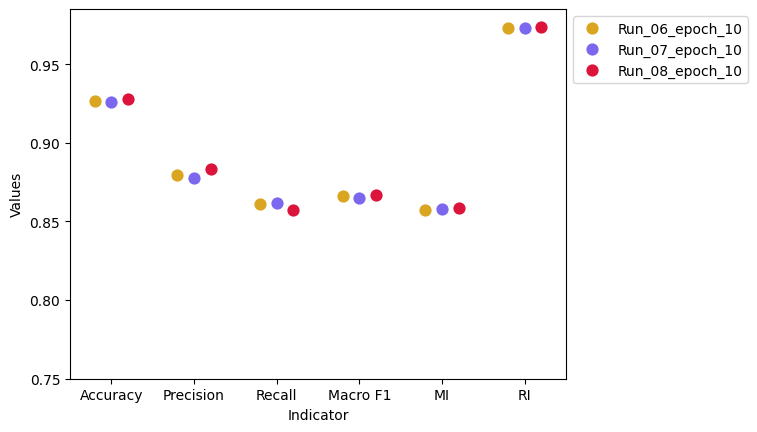

In [9]:
#| label: fig-runepoch1
#| fig-cap: "Graph of different indicators for epoch 1."

# For loop that runs through 3 values assigned to the run names (which range from 0 to 8, as we have 3 epochs 1, 3 epochs 5 and 3 epochs 10) and stores the indicator values and their variances in lists.
results_2=[]
index_2 = []
variance_fold_2 = []

# Read the file that interest us, in this case run from 10 epoch
## Index is for create a new column by naming the various averages according to their epoch (WARNING: THIS NAMES IN ORDER OF ENTRY (folders must therefore be arranged upstream)).
for i in range (6,9):
    indicator_result_run_2 = pd.read_csv(os.path.join(PATH_EXPERIMENT_OUTPUT_ANALYSIS, "run_0"+ str(i), "indicators_results_annotation.csv"))
    if i < 3 :
          index_2.append("Run_0" + str(i) + "_epoch_1")
    elif i >= 3 and i <= 5:
         index_2.append("Run_0" + str(i) + "_epoch_5")
    else :
        index_2.append("Run_0" + str(i) + "_epoch_10")
    del indicator_result_run_2["k_fold"]
    results_2.append(indicator_result_run_2.mean())

# Change the name of indicator for best comprehension and display
indicator_result_run_2 =indicator_result_run_2.rename(columns = {'mutual_info':"MI"})
indicator_result_run_2=indicator_result_run_2.rename(columns = {'rand_index':"RI"})
indicator_result_run_2=indicator_result_run_2.rename(columns = {'macro_f1':"Macro F1"})
indicator_result_run_2=indicator_result_run_2.rename(columns = {'accuracy':"Accuracy"})
indicator_result_run_2=indicator_result_run_2.rename(columns = {'precision':"Precision"})
indicator_result_run_2=indicator_result_run_2.rename(columns = {'recall':"Recall"})

# Create dataframe to be able to use sns pointplot
results_2 = pd.DataFrame(np.vstack(results_2))
results_2.columns = indicator_result_run_2.columns
results_2["run"] = index_2

# Parameter for the plot.
pattern_palette_2 = {"Run_06_epoch_10": 'goldenrod', "Run_07_epoch_10": 'mediumslateblue', "Run_08_epoch_10": 'crimson'}
df_indicator_result_2 = results_2.melt(id_vars=['run'], var_name='Indicator', value_name='Values')
fig, ax = plt.subplots()
sns.pointplot(data=df_indicator_result_2, x='Indicator', y='Values', linestyle='none', hue='run', palette=pattern_palette_2, dodge=0.4)

# Change the parameter for the plot.
ax.set_ylim(0.750, 0.985)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

#plt.savefig('/mnt/DOSI/PLATEFORMES/BIOINFORMATIQUE/04_PROJECT/scLLM/Human_Thymus_Development_Atlas/05_Output/fig/fig_different_run_epoch_10_scGPT.png', bbox_inches='tight')
plt.show()

##### Run of different epoch (1, 5 & 10)

In [11]:
results=[]
index = []
variance_fold = []

# Same principle as above, but we take all the run.
## Index is for create a new column by naming the various averages according to their epoch (WARNING: THIS NAMES IN ORDER OF ENTRY (folders must therefore be arranged upstream)).
for i in range (0,9):
    indicator_result_run = pd.read_csv(os.path.join(PATH_EXPERIMENT_OUTPUT_ANALYSIS, "run_0"+ str(i), "indicators_results_annotation.csv"))
    if i < 3 :
        index.append("Run_0" + str(i) + "_epoch_1")
    elif i >= 3 and i <= 5:
        index.append("Run_0" + str(i) + "_epoch_5")
    else :
        index.append("Run_0" + str(i) + "_epoch_10")
    del indicator_result_run["k_fold"]
    # Stores in the list the averages (for each fold) of all the indicators present in the file.
    results.append(indicator_result_run.mean())
    # Stock the variance with the mean obtained above (which will be used for the last graph)
    variance_fold.append(stdev(indicator_result_run["accuracy"]))

# Change the name of indicator for best comprehension and display
indicator_result_run =indicator_result_run.rename(columns = {'mutual_info':"MI"})
indicator_result_run=indicator_result_run.rename(columns = {'rand_index':"RI"})
indicator_result_run=indicator_result_run.rename(columns = {'macro_f1':"Macro F1"})
indicator_result_run=indicator_result_run.rename(columns = {'accuracy':"Accuracy"})
indicator_result_run=indicator_result_run.rename(columns = {'precision':"Precision"})
indicator_result_run=indicator_result_run.rename(columns = {'recall':"Recall"})

# We transform our list into a dataframe
results = pd.DataFrame(np.vstack(results))
# The new dataframe takes the same column names as the previous files
results.columns = indicator_result_run.columns
# Creation of category to apply different names.
results["run"] = index

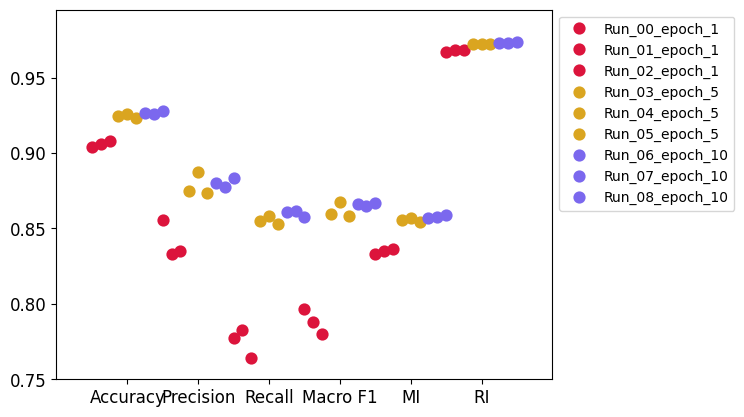

In [35]:
#| label: fig-rundifferentepoch
#| fig-cap: "Graph of the different indicators according to their epochs."

# We come to assign the different colors for our different points and values
pattern_palette = {"Run_00_epoch_1": 'crimson', "Run_01_epoch_1": 'crimson', "Run_02_epoch_1": 'crimson', "Run_03_epoch_5": 'goldenrod', "Run_04_epoch_5":'goldenrod', "Run_05_epoch_5":"goldenrod", "Run_06_epoch_10":'mediumslateblue', "Run_07_epoch_10":'mediumslateblue',"Run_08_epoch_10":'mediumslateblue'} #crimson, limegreen, dodgerblue, goldenrod, mediumslateblue
# Create a new dataset to put the indicators, their folds and their values in columns for display in the graph.
df_indicator_result = results.melt(id_vars=['run'], var_name='Indicator', value_name='Values')
# Point Plot of indicators and values, as a function of k_folds with mean and standard deviation.
fig, ax = plt.subplots()
fig_replicat = sns.pointplot(data=df_indicator_result, x='Indicator', y='Values', linestyle='none', hue='run', palette=pattern_palette, dodge = 1)

# Change the parameter for the plot.
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim(0.75, 0.995)
plt.xlim([-1, 6])
ax.set_xlabel("", fontsize=1) #Remove the name that don't interest us
ax.set_ylabel("", fontsize=1) #Remove the name that don't interest us
plt.xticks(fontsize=12) #change the size of label x
plt.yticks(fontsize=12) #change the size of label y

#plt.savefig('/mnt/DOSI/PLATEFORMES/BIOINFORMATIQUE/04_PROJECT/scLLM/Human_Thymus_Development_Atlas/05_Output/fig/fig_replicat.png')
plt.show()

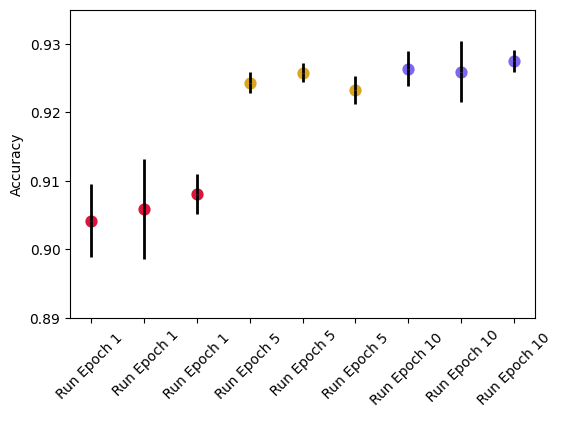

In [14]:
#| label: Graphique_accuracy_variance
#| fig-cap: "Graph of accuracy and variances according to different epochs."

# Defines chart size
results.loc[0, "run"] = 'Run Epoch 1 '
results.loc[1, "run"] = ' Run Epoch 1'
results.loc[2, "run"] = ' Run Epoch 1 '
results.loc[3, "run"] = 'Run Epoch 5 '
results.loc[4, "run"] = ' Run Epoch 5'
results.loc[5,"run"] = ' Run Epoch 5 '
results.loc[6,"run"] = 'Run Epoch 10 '
results.loc[7, "run"] = ' Run Epoch 10'
results.loc[8, "run"] = ' Run Epoch 10 '

pattern_palette_4 = {"Run Epoch 1 ": 'crimson', " Run Epoch 1": 'crimson', " Run Epoch 1 ": 'crimson', "Run Epoch 5 ":"goldenrod", " Run Epoch 5":"goldenrod", " Run Epoch 5 ":"goldenrod", " Run Epoch 10":'mediumslateblue', "Run Epoch 10 ":'mediumslateblue', " Run Epoch 10 ":'mediumslateblue'} #crimson, limegreen, dodgerblue, goldenrod, mediumslateblue
fig,ax = plt.subplots(figsize=(6,4))
# We set up and draw the graph with the values 
sns.pointplot(data=results, x='run', y='Accuracy', linestyle='none', palette=pattern_palette_4, hue='run')
# Defines the size of the axes (in our case, only the y axis)
ax.set(ylim=(0.895, 0.95))

# For loop reading the list of variances, which adds these infromations to the graph.
acc_coord_x = 0
for i in range (0, len(variance_fold)):
    Ecart_type_bas = results["Accuracy"][i] - variance_fold[i]
    Ecart_type_haut = results["Accuracy"][i] + variance_fold[i]
    plt.vlines(x = acc_coord_x, ymin= results["Accuracy"][i], ymax = Ecart_type_haut, colors='black', lw=2)
    plt.vlines(x = acc_coord_x, ymin= results["Accuracy"][i], ymax = Ecart_type_bas, colors='black', lw=2)
    acc_coord_x = acc_coord_x + 1

# Change the parameter for the plot.
plt.ylim([0.89, 0.935])
ax.set_xlabel("", fontsize=1)
plt.xticks(rotation=45)
#plt.savefig('/mnt/DOSI/PLATEFORMES/BIOINFORMATIQUE/04_PROJECT/scLLM/Human_Thymus_Development_Atlas/05_Output/fig/fig_all_epoch_scBERT.png', bbox_inches='tight')
plt.show()

In [12]:
#| label: fig-data-results
#| fig-cap: "Table of all data used for graphing"

results

,accuracy,precision,recall,macro_f1,mutual_info,rand_index,run
0,0.904199,0.855362,0.777197,0.796641,0.833196,0.966730,Run_00_epoch_1
1,0.905891,0.832849,0.782823,0.787738,0.834747,0.968001,Run_01_epoch_1
2,0.908053,0.834829,0.764027,0.780190,0.836139,0.968144,Run_02_epoch_1
3,0.924355,0.874571,0.854604,0.859289,0.855704,0.972467,Run_03_epoch_5
4,0.925782,0.887236,0.858088,0.867819,0.856889,0.972559,Run_04_epoch_5
5,0.923331,0.873490,0.852867,0.858346,0.854379,0.972271,Run_05_epoch_5
6,0.926414,0.879799,0.861081,0.865964,0.857052,0.972888,Run_06_epoch_10
7,0.925958,0.877384,0.861629,0.865006,0.857854,0.973061,Run_07_epoch_10
8,0.927544,0.883293,0.857415,0.866543,0.858573,0.973695,Run_08_epoch_10


### Mean and variance graph of different epoch

In [15]:
liste_choice_file = [3,5,6] # Need to put number for, epoch 1, 5 and 10.

for i in liste_choice_file:
    df_diagonal_value_matrix = pd.DataFrame()
    PATH_EXPERIMENT_OUTPUT_ANALYSIS_RUN = os.path.join(PATH_EXPERIMENT_OUTPUT_ANALYSIS, "run_0"+str(i))
    liste_directorie_run = os.listdir(PATH_EXPERIMENT_OUTPUT_ANALYSIS_RUN)
    liste_directorie_run = np.sort(liste_directorie_run)
    for elt in liste_directorie_run:
    # Stores string elements in string format
        chaine=str(elt)
        # If the item has "K_Fold" then we'll enter the directory.
        if "K_Fold" in chaine :
            # We create a path containing the directory to be able to access it
            PATH_K_FOLD = os.path.join( PATH_EXPERIMENT_OUTPUT_ANALYSIS_RUN, chaine)
            # We read the confusion matrix in the above directory.
            matrix_confusion = pd.read_csv(os.path.join(PATH_K_FOLD, "matrix_confusion_results_annotation.csv"))
            # We index the cell types
            matrix_confusion.index = matrix_confusion["Unnamed: 0"]
            # The cell type column in the index is now deleted.
            del matrix_confusion["Unnamed: 0"]
            # The index is stored in our dataframe in a column named “CellType”.
            df_diagonal_value_matrix["CellType"] = matrix_confusion.index
            # We store the set of values present in the diagonal of the matrix in the column named K_Fold_ and its name
            df_diagonal_value_matrix[chaine] = np.diag(matrix_confusion)
            
    # We replace the matrix index with the cell type names
    df_diagonal_value_matrix.index = df_diagonal_value_matrix['CellType']
    # We remove the cell type column, which is now in the index, to have only numerical values.
    del df_diagonal_value_matrix['CellType']
    df_diagonal_value_matrix['Variance'] = df_diagonal_value_matrix.var(axis='columns')
    df_diagonal_value_matrix['Mean'] = df_diagonal_value_matrix.loc[:,[c for c in df_diagonal_value_matrix.columns if c!= "Variance"]].mean(axis=1)
    if liste_choice_file[0] == i :
        df_diagonal_value_matrix_epoch_1 = df_diagonal_value_matrix
    elif liste_choice_file[1] == i :
        df_diagonal_value_matrix_epoch_5 = df_diagonal_value_matrix
    elif liste_choice_file[2] == i :
        df_diagonal_value_matrix_epoch_10 = df_diagonal_value_matrix

##### Plot diagramm worst cell type prediction by epoch

In [16]:
# We retrieve the values below 0.8 and change the type to set to be read in the Venn diagram.
df_diagramme_epoch_1 = df_diagonal_value_matrix_epoch_1.loc[df_diagonal_value_matrix_epoch_1['Mean'] < 0.8]
set1 = df_diagramme_epoch_1.index.tolist()
set1 = set(set1)

df_diagramme_epoch_5 = df_diagonal_value_matrix_epoch_5.loc[df_diagonal_value_matrix_epoch_5['Mean'] < 0.8]
set2 = df_diagramme_epoch_5.index.tolist()
set2 = set(set2)

df_diagramme_epoch_10 = df_diagonal_value_matrix_epoch_10.loc[df_diagonal_value_matrix_epoch_10['Mean'] < 0.8]
set3 = df_diagramme_epoch_10.index.tolist()
set3 = set(set3)

/home/jovyan/.local/lib/python3.10/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


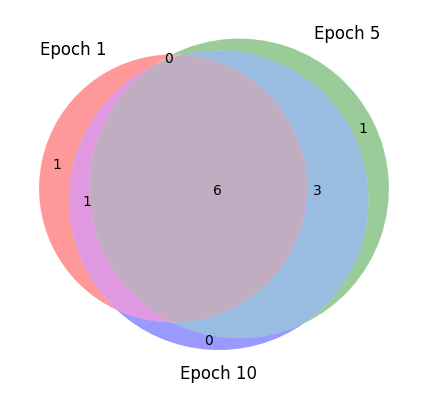

In [17]:
from matplotlib_venn import venn3

venn3([set1, set2, set3], set_labels = ('Epoch 1', 'Epoch 5', 'Epoch 10'))
plt.show()

##### Plot with data and color

In [19]:
# Read for check the name cell type with the good number in every fold
dataframe_liste_number_per_fold_epoch_1 = pd.read_csv(os.path.join(PATH_EXPERIMENT_OUTPUT_ANALYSIS_RUN, "dataframe_liste_number_per_fold.csv"))
id_cell_type_epoch_1 = pd.read_csv(os.path.join(PATH_EXPERIMENT_OUTPUT_ANALYSIS_RUN, "id_map_results_annotation.csv"))

# Duplicate the value in new columns
id_cell_type_epoch_1["Valeur"] = id_cell_type_epoch_1["0"]
del id_cell_type_epoch_1["0"]
dataframe_liste_number_per_fold_epoch_1["Valeur"] = dataframe_liste_number_per_fold_epoch_1.index

# Merge and get only one dataframe.
df_list_cell_type_epoch_1 = pd.merge(dataframe_liste_number_per_fold_epoch_1, id_cell_type_epoch_1, on="Valeur")
df_list_cell_type_epoch_1.index = df_list_cell_type_epoch_1["fibroblast"]
del df_list_cell_type_epoch_1["Valeur"]
del df_list_cell_type_epoch_1["fibroblast"]

# Create 3 columns for every epochs
df_list_cell_type_epoch_1["Epoch_1"] = "Na"
df_list_cell_type_epoch_1["Epoch_5"] = "Na"
df_list_cell_type_epoch_1["Epoch_10"] = "Na"

# Select and put in the dataframe, when the transformer are not abale to give the good cell_type.
for i in set1:
    for x in df_list_cell_type_epoch_1.index:
        if i == x :
            df_list_cell_type_epoch_1.loc[x, "Epoch_1"] = "TRUE"

for i in set2:
    for x in df_list_cell_type_epoch_1.index:
        if i == x :
            df_list_cell_type_epoch_1.loc[x, "Epoch_5"] = "TRUE"

for i in set3:
    for x in df_list_cell_type_epoch_1.index:
        if i == x :
            df_list_cell_type_epoch_1.loc[x, "Epoch_10"] = "TRUE"

In [20]:
# Create a function for color every row, with 3 conditions (for epoch TRUE or Na).
def highlight_rows(s):
    color = s.copy()
    color[:] = None
    if (s['Epoch_1'] == 'TRUE' and s['Epoch_5'] == 'TRUE' and s['Epoch_10'] == 'TRUE'):
        color[:] = "background-color: #c1adc1"
    elif (s['Epoch_1'] == 'TRUE' and s['Epoch_5'] == 'Na' and s['Epoch_10'] == 'Na'):
        color[:] = "background-color: #ff9999"
    elif (s['Epoch_1'] == 'Na' and s['Epoch_5'] == 'TRUE' and s['Epoch_10'] == 'Na'):
        color[:] = "background-color: #99cc99"
    elif (s['Epoch_1'] == 'Na' and s['Epoch_5'] == 'Na' and s['Epoch_10'] == 'TRUE'):
        color[:] = "background-color: #9999ff"
    elif (s['Epoch_1'] == 'Na' and s['Epoch_5'] == 'TRUE' and s['Epoch_10'] == 'TRUE'):
        color[:] = "background-color: #99bce0"
    elif (s['Epoch_1'] == 'TRUE' and s['Epoch_5'] == 'TRUE' and s['Epoch_10'] == 'Na'):
        color[:] = "background-color: #e0bc99"
    elif (s['Epoch_1'] == 'TRUE' and s['Epoch_5'] == 'Na' and s['Epoch_10'] == 'TRUE'):
        color[:] = "background-color: #e099e0"
    else :
        color[:] = "background-color: #eeeeee"
    return color

df_list_cell_type_epoch_1.style.apply(highlight_rows, axis=1)

,0,1,2,3,4,Epoch_1,Epoch_5,Epoch_10
fibroblast,,,,,,,,
T cell,576,576,576,576,575,Na,Na,Na
mast cell,1357,1357,1357,1356,1356,Na,Na,Na
endothelial cell,2652,2652,2651,2651,2651,Na,Na,Na
erythrocyte,329,329,329,329,328,Na,TRUE,TRUE
macrophage,723,723,723,723,722,Na,Na,Na
vascular associated smooth muscle cell,2247,2247,2247,2247,2247,Na,TRUE,TRUE
dendritic cell,1883,1882,1882,1882,1882,Na,Na,Na
lymphocyte,525,525,525,525,525,TRUE,TRUE,TRUE
monocyte,8495,8495,8495,8495,8494,TRUE,TRUE,TRUE
